In [7]:
# -- coding:utf-8 --
import seaborn as sns 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy
import matplotlib.pyplot as plt
import sklearn
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
print(os.listdir("./"))

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load dataset
url_sub = './gender_submission.csv'
url_train = './train.csv'
url_test = './test.csv'
dataset_sub = pd.read_csv(url_sub)
dataset_train = pd.read_csv(url_train)
dataset_test = pd.read_csv(url_test)

['.ipynb_checkpoints', 'gender_submission.csv', 'test.csv', 'test.ipynb', 'Titanic.ipynb', 'train.csv']


In [ ]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# data visualization
fig = plt.figure()
fig.set(alpha=0.2)


plt.subplot2grid((2,3),(0,0))
dataset_train.Survived.value_counts().plot(kind='bar')
plt.title(u'获 救 情 况')
plt.ylabel(u'人数')

In [ ]:
x = np.random.randn(1000)
pd.DataFrame(x).describe()

plt.style.use('ggplot')

%matplotlib inline

plt.hist(x);


In [ ]:
y = np.random.randn(1000)
pd.DataFrame(y).describe()

In [ ]:
t = [1, 2, 3, 4, 5]
fig = plt.figure()
fig.patch.set_alpha(0.5)
fig.set_facecolor('b')
plt.plot(t, t)
fig2 = plt.figure()
fig2.set_facecolor('b')
plt.plot(t,t)

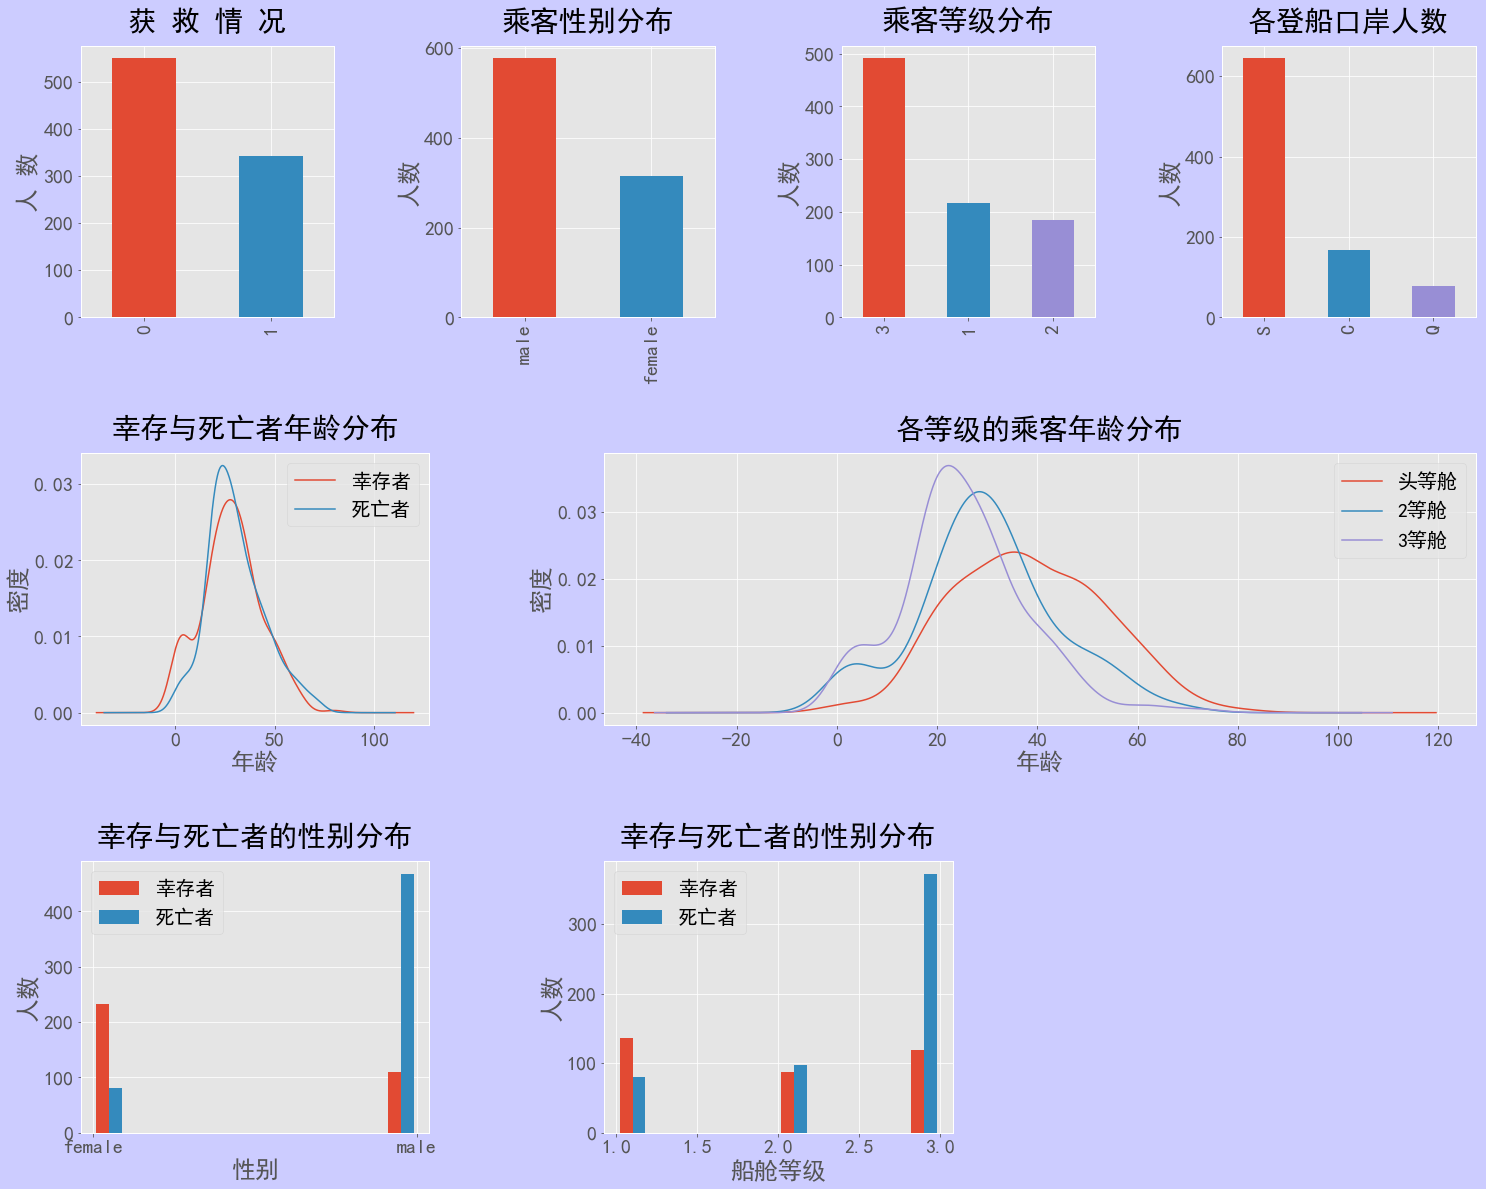

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

plt.style.use('ggplot')
fig = plt.figure(figsize = (25,20))


# plt.rcParams["figure.titlesize"] = 'medium'
plt.rcParams["legend.fontsize"] = 'medium'
plt.rcParams['axes.titlepad'] = 15
plt.rcParams["font.size"] = 20
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# data visualization
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.2)
plt.subplots_adjust(wspace =0.5, hspace =0.5)#调整子图间距


# 第一幅图展示获救情况（幸存者数量比例）
plt.subplot2grid((3,4),(0,0))
x = dataset_train.Survived.value_counts()
x.plot(kind='bar')
plt.title(u'获 救 情 况')
plt.ylabel(u'人 数')

# 第二幅图展示不同等级乘客分布
plt.subplot2grid((3,4),(0,1))
dataset_train.Sex.value_counts().plot(kind='bar')
plt.ylabel(u"人数")
plt.title(u"乘客性别分布")

# 第二幅图展示不同等级乘客分布
plt.subplot2grid((3,4),(0,2))
dataset_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

# 展示各登岸口人数分布
plt.subplot2grid((3,4),(0,3))
dataset_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸人数")
plt.ylabel(u"人数")

# 第三幅图展示幸存与死亡者的年龄分布
plt.subplot2grid((3,3),(1,0))
# plt.scatter(dataset_train.Survived,dataset_train.Age)
dataset_train.Age[dataset_train.Survived == 1].plot(kind='kde')
dataset_train.Age[dataset_train.Survived == 0].plot(kind='kde')
plt.title(u'幸存与死亡者年龄分布')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.legend((u'幸存者',u'死亡者'),loc='best')

# 第四幅图展示各等级乘客的年龄分布
plt.subplot2grid((3,3),(1,1),colspan=2)
dataset_train.Age[dataset_train.Pclass == 1].plot(kind='kde')
dataset_train.Age[dataset_train.Pclass == 2].plot(kind='kde')
dataset_train.Age[dataset_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱',u'2等舱',u'3等舱'),loc='best')

# 第三幅图展示幸存与死亡者的性别分布
plt.subplot2grid((3,3),(2,0))
x = np.array(dataset_train.Sex[dataset_train.Survived == 1])
y = np.array(dataset_train.Sex[dataset_train.Survived == 0])
plt.hist([x,y], histtype='bar')
plt.title(u'幸存与死亡者的性别分布')
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.legend((u'幸存者',u'死亡者'),loc='best')

# 第三幅图展示幸存与死亡者的船舱等级分布
plt.subplot2grid((3,3),(2,1))
x = np.array(dataset_train.Pclass[dataset_train.Survived == 1])
y = np.array(dataset_train.Pclass[dataset_train.Survived == 0])
plt.hist([x,y], histtype='bar')
plt.title(u'幸存与死亡者的性别分布')
plt.xlabel(u"船舱等级")
plt.ylabel(u"人数")
plt.legend((u'幸存者',u'死亡者'),loc='best')




Text(0, 0.5, '人数')

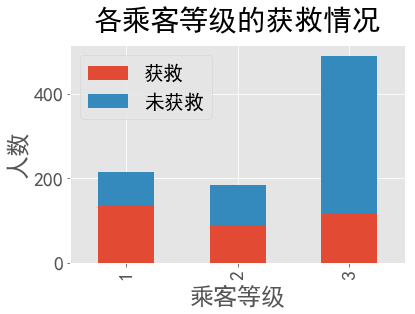

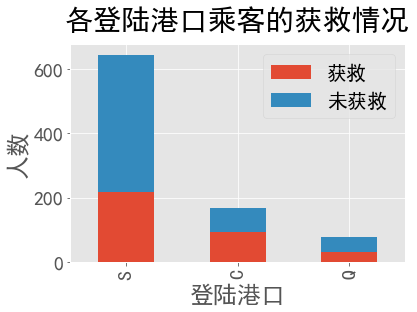

In [10]:

### 将Pclass设为行索引
Survived_0 = dataset_train.Pclass[dataset_train.Survived == 0].value_counts()
Survived_1 = dataset_train.Pclass[dataset_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_1,u'未获救':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")

Survived_E0 = dataset_train.Embarked[dataset_train.Survived == 0].value_counts()
Survived_E1 = dataset_train.Embarked[dataset_train.Survived == 1].value_counts()
df = pd.DataFrame({u"获救":Survived_E1,u"未获救":Survived_E0})
df.plot(kind='bar',stacked=True)
plt.title(u"各登陆港口乘客的获救情况")
plt.xlabel(u"登陆港口")
plt.ylabel(u"人数")

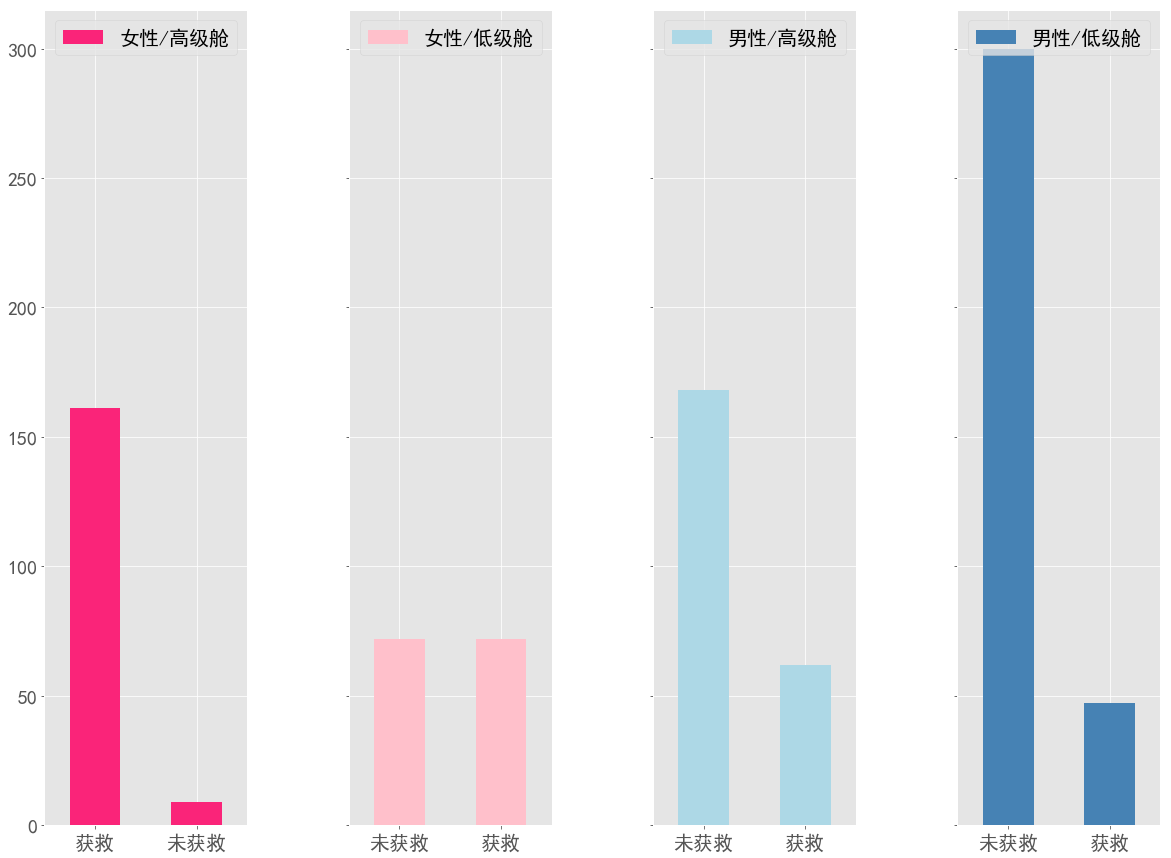

In [32]:
data_train = dataset_train
data_test = dataset_test


fig=plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace =0.5, hspace =0.5)#调整子图间距
plt.rcParams["font.size"] = 20

plt.title(u"根据舱等级和性别的获救情况")

ax1 = plt.subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar',label='female highclass',color='#FA2479')
ax1.set_xticklabels([u"获救",u"未获救"],rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=plt.subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=plt.subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=plt.subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

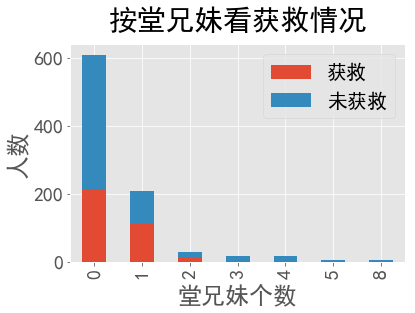

In [48]:
Survived_S0 = data_train.SibSp[data_train.Survived == 0].value_counts()
Survived_S1 = data_train.SibSp[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_S1,u'未获救':Survived_S0})
df.plot(kind='bar',stacked=True)
plt.title(u"按堂兄妹看获救情况")
plt.xlabel(u"堂兄妹个数")
plt.ylabel(u"人数")

g = data_train.groupby(['SibSp','Survived'])
df = g.count()['PassengerId']
df


C23 C25 C27        4
G6                 4
B96 B98            4
C22 C26            3
F2                 3
F33                3
E101               3
D                  3
C2                 2
B57 B59 B63 B66    2
B20                2
C123               2
E24                2
D33                2
B28                2
D36                2
E25                2
E33                2
D35                2
B5                 2
E121               2
B58 B60            2
B77                2
C125               2
B49                2
B51 B53 B55        2
C124               2
F G73              2
C52                2
E8                 2
                  ..
D15                1
B82 B84            1
C101               1
D49                1
E68                1
E46                1
A32                1
A23                1
B101               1
A36                1
C46                1
A19                1
D46                1
D28                1
E38                1
C87                1
A26          

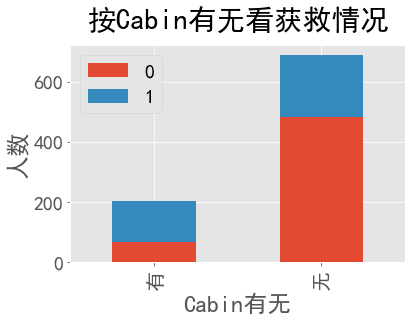

In [51]:
print(data_train.Cabin.value_counts())

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()


In [53]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)


E:\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
E:\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [1]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

NameError: name 'pd' is not defined

In [55]:
print(len(data_train),len(data_test))
data_all = data_train.append(data_test)
data_all

891 418


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000,No,S,7.250,"Braund, Mr. Owen Harris",0,1,3,male,1,0.000,A/5 21171
1,38.000,Yes,C,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.000,PC 17599
2,26.000,No,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1.000,STON/O2. 3101282
3,35.000,Yes,S,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.000,113803
4,35.000,No,S,8.050,"Allen, Mr. William Henry",0,5,3,male,0,0.000,373450
5,23.839,No,Q,8.458,"Moran, Mr. James",0,6,3,male,0,0.000,330877
6,54.000,Yes,S,51.862,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.000,17463
7,2.000,No,S,21.075,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.000,349909
8,27.000,No,S,11.133,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.000,347742
9,14.000,No,C,30.071,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.000,237736


In [39]:
data_train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C


In [40]:
data_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [4]:
import numpy as np
a  = np.array([1,2,3,4])
a.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4]])